## Instructions
- See deadline on the course web page
- See examination rules on the course web page.
- This problem set is performed individually (collaboration is encouraged, but each individual must be able to explain all of his/her hand-in solutions).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [1]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Ohlman'  # string
student['Firstname']='Elin' # string
student['CID']='ohlman'        # string
student['DOB-year']=1998        # four-digit integer
student['DOB-month']=6           # integer in the range [1, 12]
student['DOB-day']=18             # integer in the range [1, 31]

# 
# YOUR CODE HERE
# 

In [2]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 1
## Extra problems
### Learning from data [TIF285], Chalmers, Fall 2020

Last revised: 29-Aug-2020 by Christian Forssén [christian.forssen@chalmers.se]

## Instructions
- See deadline on the course web page
- This problem set is performed individually (but collaboration is encouraged).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- See examination rules on the course web page.
- Hand-in is performed through the following action:
  - Make sure to always complete **Task 0** in the *"Basic problems" notebook. This corresponds to providing your personal details and is needed for examination.
  - Upload your solution in the form of your edited version of this jupyter notebook via Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

In [1]:
# import modules

# 
# YOUR CODE HERE
# 

import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import emcee as emcee

# I imported the same modules as in the basic task in case you wanted the same ones here

## Problem 5 (extra)
### (3 points)

#### Reload the third dataset from Problem 3

In [2]:
datafile = 'DataFiles/dataset3.dat'
X, y = np.loadtxt(datafile, unpack=True)
m = len(X)
X = X.reshape(m,1); y = y.reshape(m,1)

#### Validation curves
Create a validation curve for the polynomial model (for different degrees) where you plot the training score and the validation score as a function of the model complexity. 
- The model complexity is simply the degree of the polynomial.
- For the computation of training and validation scores you are encouraged to use cross-validation which is more stable than the use of a single, random pair of training and validation sets.

Question to ponder:
- From this curve: Which order polynomial do you think was used when generating the data?

*Hint:* `scikit-learn` has a function `validation_curve` that might be useful. However, it is certainly instructive to implement the calculation of learning curves yourself.

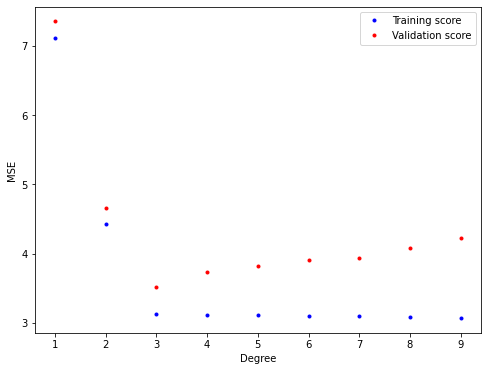

In [3]:
# 
# YOUR CODE HERE
# 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

lin_reg = LinearRegression()  #model used to do the fit
k = 10 #no of splits
kf = KFold(n_splits=k, shuffle = False)   #method used to do the k fold validation, if you want you can also shuffle the data before splitting it

#arrays to save the data
MSE_train_mean = [] 
MSE_val_mean = []

for degree in np.arange(1,10): #looping over different degrees
    MSE_train = 0
    MSE_val = 0
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)  #used to make the design matrix
    for train_index, val_index in kf.split(X):  #looping over the k splits for k-fold cross validation
        #arrays of training and validation data for each loop. Using np.c_ to get correct format
        X_train = np.c_[np.take(X,train_index)]  
        y_train = np.c_[np.take(y,train_index)]
        X_val = np.c_[np.take(X,val_index)]
        y_val = np.c_[np.take(y,val_index)]
        X_train_d = poly_features.fit_transform(X_train) #design matrix
    
        lin_reg.fit(X_train_d, y_train)  #fiting the model to the data
        y_train_predict = lin_reg.predict(X_train_d) #using the fit to predict y values for the training data
        X_val_poly = poly_features.transform(X_val) #formating the data so we can predict y values for the val data
        y_val_predict = lin_reg.predict(X_val_poly) #using the fit to predict y values for the validation data
        #summing the MSE values for every split
        MSE_train += mean_squared_error(y_train,y_train_predict) 
        MSE_val += mean_squared_error(y_val, y_val_predict)
    #dividing the summed MSE values by k to get the mean value of them for the specific degree value and saving it in the array
    MSE_train_mean.append(MSE_train/k)
    MSE_val_mean.append(MSE_val/k)
    

#plotting the training and validation scores for differnt degrees.
degree = np.arange(1,10)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(degree, MSE_train_mean, "b.",label="Training score")
ax.plot(degree, MSE_val_mean, "r.",label="Validation score")
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')
ax.legend(loc='best');                                                



I think the data was generated from an degree 3 polynomial since that has the lowest validation score. For higher degrees the model is overfitted and the validation score increases.

## Problem 6 (extra)
### (3 points)

### Gradient descent methods

#### Generate noisy data with a quadratic feature
This is the same data as in Problem 2.

In [4]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

#### (a) Batch and stochastic gradient descent
Implement both batch and stochastic gradient descent and use these methods to find the best fit parameters of a quadratic model.
- You might want to tune the learning hyperparameter $\eta$.
- Do 50 epochs for the SGD (each epoch corresponding to using all instances of data once)
- Compare with the solution from Problem 2.

In [5]:
# Implement BGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_bgd = np.array([0., 0., 0.]) # Note the order

# 
# YOUR CODE HERE
# 

conv = False #if it has converged
eta = 0.05 # learning hyperparameter
m = len(X)

theta = 2*np.random.rand(3) #random initiation of theta
theta_path_bgd = [] #save the path of theta

while not conv:
    #calculate the gradient, mean value of the gradient for every data point
    gradient = np.ones(3)
    gradient[0] = 1.0/m * sum([(theta[0] + theta[1]*X[i] + theta[2]*X[i]**2 - y[i]) for i in range(m)]) 
    gradient[1] = 1.0/m * sum([(theta[0] + theta[1]*X[i] + theta[2]*X[i]**2 - y[i])*X[i] for i in range(m)])
    gradient[2] = 1.0/m * sum([(theta[0] + theta[1]*X[i] + theta[2]*X[i]**2 - y[i])*X[i]**2 for i in range(m)]) 
    
    theta = theta - eta*gradient #update theta
    theta_path_bgd.append(theta) #save the theta values
    
    #check if it converges by checking that everey term of the gradient is close to zero
    if abs(gradient[0]) < 1e-04 and abs(gradient[1]) < 1e-04 and abs(gradient[2]) < 1e-04: 
        conv = True
theta_bgd = theta
theta_path_bgd = np.transpose(theta_path_bgd)

In [6]:
# Implement SGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_sgd = np.array([0., 0., 0.]) # Note the order

# 
# YOUR CODE HERE
# 

m = len(X)
n_epochs = 50
t0, t1 =100, 1000  # learning schedule hyperparameters 5 10 ok
theta = np.random.rand(3)  # random initialization

# We will store the iterations in a list to monitor the convergence
theta_path_sgd = []

def learning_schedule(t):
    return t0 / (t + t1)


for epoch in range(n_epochs):
    for i in range(m):
        # pick a random data point
        random_index = np.random.randint(m)
        #calculate gradient for that datapoint
        gradient = np.ones(3)
        gradient[0] = theta[0] + theta[1]*X[random_index] + theta[2]*X[random_index]**2 - y[random_index]
        gradient[1] = (theta[0] + theta[1]*X[random_index] + theta[2]*X[random_index]**2 - y[random_index])*X[random_index]
        gradient[2] = (theta[0] + theta[1]*X[random_index] + theta[2]*X[random_index]**2 - y[random_index])*X[random_index]**2
        eta = learning_schedule(epoch * m + i)
        #update theta
        theta = theta - eta*gradient
        theta_path_sgd.append(theta)  
theta_sgd = theta
theta_path_sgd = np.transpose(theta_path_sgd)


In [7]:
assert theta_bgd.shape ==(3,)
assert not (theta_bgd==0).any()
assert theta_sgd.shape ==(3,)
assert not (theta_sgd==0).any()


#### (b) Mini-batch gradient descent
Implement mini-batch gradient descent and use this method to find the best fit parameters. Details:
- use a mini-batch size of 20%
- apply a similar learning schedule as in the SGD example (you might have to tune the learning hyperprameters)
- perform 50 epochs 
- hint: the `numpy.random.permutation` function might be useful for creating the mini-batches. 
- Compare with the solutions from BGD and SGD.

In [26]:
# Implement MBGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_mbgd = np.array([0., 0., 0.]) # Note the order

# 
# YOUR CODE HERE
# 
m = len(X)
theta = np.random.rand(3)  # random initialization
n_epochs = 50
t0, t1 = 40, 150  # 5 10learning schedule hyperparameters, i have tried a lot of different ones but have found none that make the method converge :(
def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mbgd = []
n = 0 # no of iterations
for epoch in range(n_epochs):
    index = np.arange(m)
    np.random.shuffle(index)
    index = np.split(index, 5)
    
    for indexes in index:
        n +=1
        gradient = np.ones(3)
        gradient[0] = 1.0/len(indexes) * sum([(theta[0] + theta[1]*X[i] + theta[2]*X[i]**2 - y[i]) for i in indexes]) 
        gradient[1] = 1.0/len(indexes) * sum([(theta[0] + theta[1]*X[i] + theta[2]*X[i]**2 - y[i])*X[i] for i in indexes])
        gradient[2] = 1.0/len(indexes) * sum([(theta[0] + theta[1]*X[i] + theta[2]*X[i]**2 - y[i])*X[i]**2 for i in indexes]) 
        eta = learning_schedule(n)
        theta = theta - eta*gradient
        theta_path_mbgd.append(theta)

theta_mbgd = theta
theta_path_mbgd = np.transpose(theta_path_mbgd)


In [27]:
assert theta_mbgd.shape ==(3,)
assert not (theta_mbgd==0).any()


#### (c) Convergence
Compare the convergence pattern for the BGD, SGD and MGD, i.e. plot the path towards the optimal set of parameters. 
- Note that the path is in 3D (since there are three parameters in our quadratic model). You can plot 2D projections of the path.

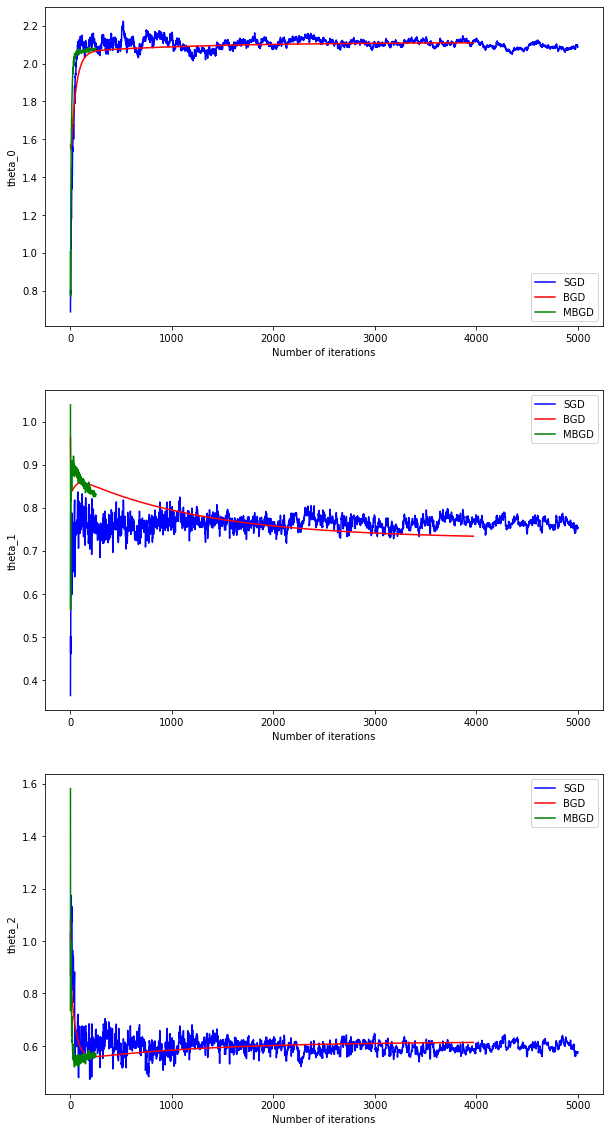

In [28]:
# 
# YOUR CODE HERE
# 
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(np.arange(len(theta_path_sgd[0])), theta_path_sgd[0], "b-",label="SGD")
ax1.plot(np.arange(len(theta_path_bgd[0])), theta_path_bgd[0], "r-",label="BGD")
ax1.plot(np.arange(len(theta_path_mbgd[0])), theta_path_mbgd[0], "g-",label="MBGD")
#ax1.plot(theta_path_bgd[0], theta_path_bgd[1], "g.",label="wer")

ax2.plot(np.arange(len(theta_path_sgd[1])), theta_path_sgd[1], "b-",label="SGD")
ax2.plot(np.arange(len(theta_path_bgd[1])), theta_path_bgd[1], "r-",label="BGD")
ax2.plot(np.arange(len(theta_path_mbgd[1])), theta_path_mbgd[1], "g-",label="MBGD")

ax3.plot(np.arange(len(theta_path_sgd[2])), theta_path_sgd[2], "b-",label="SGD")
ax3.plot(np.arange(len(theta_path_bgd[2])), theta_path_bgd[2], "r-",label="BGD")
ax3.plot(np.arange(len(theta_path_mbgd[2])), theta_path_mbgd[2], "g-",label="MBGD")


ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('theta_0')
ax1.legend(loc='best');

ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('theta_1')
ax2.legend(loc='best');

ax3.set_xlabel('Number of iterations')
ax3.set_ylabel('theta_2')
ax3.legend(loc='best');





BGD is quite slow, we get close to the same value of theta as we got in the solution to problem 2 but we cant have a very low tolerance or take very small steps since it takes too long. 

SGD is very erratic since we only take the gradiant of one point. It is a lot faster than BGD but we also don't get a very good value of theta. Perhaps it could get better with better learning parameters but this was the best I could manage.

MBGD is a lot faster than BGD and much less erratic than SGD I was not able to find learning parameters that made it converge but I think it is because we have too few epochs.

Notice that the SGD and MBGD plots changes when you run the program again.